In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.listdir("./input"))

['recipes.json', 'recipes4000.json', 'recipes_collection.json']


In [31]:
df = pd.read_json("./input/recipes.json")

In [32]:
df.head(5)

,Url,Instructions,Ingredients,Day,Name,Year,Month,Weekday
0,https://www.chefkoch.de/rezepte/185441079701305/,Die Eier hart kochen. Dann pellen und mit eine...,"[600 g Hackfleisch, halb und halb, 800 g Sauer...",1,Gebratener Hasenrücken,2009,January,Thursday
1,https://www.chefkoch.de/rezepte/2718181424631245/,Vorab folgende Bemerkung: Alle Mengen sind Cir...,"[1 kg Strauchtomate(n), 1 Gemüsezwiebel(n), 1 ...",1,Pilz Stroganoff,2017,July,Saturday
2,https://www.chefkoch.de/rezepte/46341015661368/,"Die Kirschen abtropfen lassen, dabei den Saft ...","[1 Glas Kirsche(n), 1 Pck. Vanillepuddingpulve...",1,Kaninchen a la Gioff,2007,January,Monday
3,https://www.chefkoch.de/rezepte/51051018014178/,"Den Spargel säubern, die holzigen Enden abschn...","[500 g Spargel, grüner, 300 ml Brühe oder Fond...",1,Spanisches Knoblauch-Kaninchen,2013,April,Monday
4,https://www.chefkoch.de/rezepte/1555771262860408/,Kohlrabi schälen und klein würfeln. Mit der Br...,"[250 g Kohlrabi, 150 ml Gemüsebrühe, 150 ml Mi...",1,Gnocchi - Hack - Pfanne mit Basilikum,2017,August,Tuesday


In [33]:
# Delete Duplicate Rows
duplicate=df.drop_duplicates(['Name'],keep='first')
print("Number of Duplicated Rows: ",len(dup))

dup.head()

Number of Duplicated Rows:  192


,Url,Instructions,Ingredients,Day,Name,Year,Month,Weekday
0,https://www.chefkoch.de/rezepte/185441079701305/,Die Eier hart kochen. Dann pellen und mit eine...,"[600 g Hackfleisch, halb und halb, 800 g Sauer...",1,Gebratener Hasenrücken,2009,January,Thursday
1,https://www.chefkoch.de/rezepte/2718181424631245/,Vorab folgende Bemerkung: Alle Mengen sind Cir...,"[1 kg Strauchtomate(n), 1 Gemüsezwiebel(n), 1 ...",1,Pilz Stroganoff,2017,July,Saturday
2,https://www.chefkoch.de/rezepte/46341015661368/,"Die Kirschen abtropfen lassen, dabei den Saft ...","[1 Glas Kirsche(n), 1 Pck. Vanillepuddingpulve...",1,Kaninchen a la Gioff,2007,January,Monday
3,https://www.chefkoch.de/rezepte/51051018014178/,"Den Spargel säubern, die holzigen Enden abschn...","[500 g Spargel, grüner, 300 ml Brühe oder Fond...",1,Spanisches Knoblauch-Kaninchen,2013,April,Monday
4,https://www.chefkoch.de/rezepte/1555771262860408/,Kohlrabi schälen und klein würfeln. Mit der Br...,"[250 g Kohlrabi, 150 ml Gemüsebrühe, 150 ml Mi...",1,Gnocchi - Hack - Pfanne mit Basilikum,2017,August,Tuesday


In [34]:
# Remove unnecessary Column
df = df.drop(['Day','Month','Url','Weekday','Year'],axis=1)

df.head()

,Instructions,Ingredients,Name
0,Die Eier hart kochen. Dann pellen und mit eine...,"[600 g Hackfleisch, halb und halb, 800 g Sauer...",Gebratener Hasenrücken
1,Vorab folgende Bemerkung: Alle Mengen sind Cir...,"[1 kg Strauchtomate(n), 1 Gemüsezwiebel(n), 1 ...",Pilz Stroganoff
2,"Die Kirschen abtropfen lassen, dabei den Saft ...","[1 Glas Kirsche(n), 1 Pck. Vanillepuddingpulve...",Kaninchen a la Gioff
3,"Den Spargel säubern, die holzigen Enden abschn...","[500 g Spargel, grüner, 300 ml Brühe oder Fond...",Spanisches Knoblauch-Kaninchen
4,Kohlrabi schälen und klein würfeln. Mit der Br...,"[250 g Kohlrabi, 150 ml Gemüsebrühe, 150 ml Mi...",Gnocchi - Hack - Pfanne mit Basilikum


In [35]:
# Join Ingredients Array to Single String 
df['Ingredients'] = df['Ingredients'].apply(lambda x: ' '.join(x))

df.head()

,Instructions,Ingredients,Name
0,Die Eier hart kochen. Dann pellen und mit eine...,"600 g Hackfleisch, halb und halb 800 g Sauerkr...",Gebratener Hasenrücken
1,Vorab folgende Bemerkung: Alle Mengen sind Cir...,1 kg Strauchtomate(n) 1 Gemüsezwiebel(n) 1 Sal...,Pilz Stroganoff
2,"Die Kirschen abtropfen lassen, dabei den Saft ...","1 Glas Kirsche(n) 1 Pck. Vanillepuddingpulver,...",Kaninchen a la Gioff
3,"Den Spargel säubern, die holzigen Enden abschn...","500 g Spargel, grüner 300 ml Brühe oder Fond (...",Spanisches Knoblauch-Kaninchen
4,Kohlrabi schälen und klein würfeln. Mit der Br...,250 g Kohlrabi 150 ml Gemüsebrühe 150 ml Milch...,Gnocchi - Hack - Pfanne mit Basilikum


In [36]:
# Create Small Splited DataFrame & Save to json File (if You have weak CPU/GPU)

df = df[:4000]
df.to_json(r'./input/recipes4000.json')

In [37]:
print("we have {} Rows with {} column Recipes".format(df.shape[0], df.shape[1]))

we have 4000 Rows with 3 column Recipes


In [5]:
# !python -m spacy download de_core_news_sm  #use it in First Run

In [38]:
df.Instructions[0] #see What inside

'Die Eier hart kochen. Dann pellen und mit einem Eierschneider in Scheiben schneiden. Den Reis halbgar kochen und zur Seite stellen. Die Wurst (Kolbász) in dünne Scheiben schneiden.Den Knoblauch abziehen und fein würfeln. Die Zwiebel schälen, fein hacken und in etwas Fett glasig braten. Knoblauch und Hackfleisch dazu geben und so lange braten, bis das Hackfleisch schön krümelig wird. Den eigenen Saft nicht ganz verkochen lassen. Die Fleischmasse mit Salz, Pfeffer und Paprikapulver würzen.Das Sauerkraut kurz durchspülen, ausdrücken und abtropfen lassen (damit es nicht zu sauer wird). Das Sauerkraut in einen Topf geben und mit dem Kümmel und den Lorbeerblättern vermischen. Ca. 30 Minuten unter Zugabe von wenig Wasser bei niedriger Stufe dünsten.Eine feuerfeste Form mit etwas Öl einfetten und den Boden dünn mit Sauerkraut belegen. Darauf Kolbász und die Hälfte der in Scheiben geschnittene Eier verteilen, dann eine weitere dünne Schicht Sauerkraut drüber legen. Mit 1 Becher Schmand bedecke

In [39]:
# get 1000 get Validation TF Model
eval_df = df[3000:]
eval_df.shape

(1000, 3)

In [40]:
# get 3000 for train TF Model
df = df[:3000]
df.shape

(3000, 3)

In [41]:
import spacy
nlp = spacy.load('de_core_news_sm' , disable=['parser', 'tagger', 'ner'])

In [42]:
tokenized = [nlp(t) for t in df['Instructions'].values]

In [43]:
for t in tokenized[0]:
    print(t)

Die
Eier
hart
kochen
.
Dann
pellen
und
mit
einem
Eierschneider
in
Scheiben
schneiden
.
Den
Reis
halbgar
kochen
und
zur
Seite
stellen
.
Die
Wurst
(
Kolbász
)
in
dünne
Scheiben
schneiden
.
Den
Knoblauch
abziehen
und
fein
würfeln
.
Die
Zwiebel
schälen
,
fein
hacken
und
in
etwas
Fett
glasig
braten
.
Knoblauch
und
Hackfleisch
dazu
geben
und
so
lange
braten
,
bis
das
Hackfleisch
schön
krümelig
wird
.
Den
eigenen
Saft
nicht
ganz
verkochen
lassen
.
Die
Fleischmasse
mit
Salz
,
Pfeffer
und
Paprikapulver
würzen
.
Das
Sauerkraut
kurz
durchspülen
,
ausdrücken
und
abtropfen
lassen
(
damit
es
nicht
zu
sauer
wird
)
.
Das
Sauerkraut
in
einen
Topf
geben
und
mit
dem
Kümmel
und
den
Lorbeerblättern
vermischen
.
Ca
.
30
Minuten
unter
Zugabe
von
wenig
Wasser
bei
niedriger
Stufe
dünsten
.
Eine
feuerfeste
Form
mit
etwas
Öl
einfetten
und
den
Boden
dünn
mit
Sauerkraut
belegen
.
Darauf
Kolbász
und
die
Hälfte
der
in
Scheiben
geschnittene
Eier
verteilen
,
dann
eine
weitere
dünne
Schicht
Sauerkraut
drüber
legen
.
Mi

In [52]:
vocab = {}
for txt in tokenized:
    for token in txt:
        if token.text not in vocab.keys() and len(token.text)> 2:
            vocab[token.text] = len(vocab)

In [53]:
print("Number of unique tokens: {} for Instructions".format(len(vocab)))

Number of unique tokens: 11621 for Instructions


In [16]:
#creating Labels
ingredients = df.Ingredients

print(ingredients[0])

['600 g Hackfleisch, halb und halb', '800 g Sauerkraut', '200 g Wurst, geräucherte (Csabai Kolbász)', '150 g Speck, durchwachsener, geräucherter', '100 g Reis', '1 m.-große Zwiebel(n)', '1 Zehe/n Knoblauch', '2 Becher Schmand', '1/2TL Kümmel, ganzer', '2 Lorbeerblätter', 'Salz und Pfeffer', '4 Ei(er) (bei Bedarf)', 'Paprikapulver', 'etwas Wasser', 'Öl']


In [17]:
# Clean & filter Each Ingredients

def _filter(token):
    if len(token) < 2:
        return False
    if token.is_stop:
        return False
    if token.text[0].islower():
        return False
    if token.is_digit:
        return False
    if token.like_num:
        return False
    return True

def _clean(text):
    text = text.replace("(", "")
    text = text.split("/")[0]
    return text

In [18]:
clean = [_clean(t.text) for i in ingredients[214] for t in nlp(i) if _filter(t) and len(_clean(t.text)) >= 2]
clean

['Rosenkohl',
 'Schalotte',
 '2Tasse',
 'Hühnerbrühe',
 'Milch',
 'EL',
 'Crème',
 'Speck',
 'Kartoffelgnocchi']

In [19]:
def get_labels(ingredients, tokenized_instructions):
    labels = []
    for ing, ti in zip(ingredients, tokenized_instructions):
        l_i = []
        ci = [_clean(t.text) for i in ing for t in nlp(i) if _filter(t) and len(_clean(t.text)) >= 2]
        label = []
        for token in ti:
            l_i.append(any((c == token.text or c == token.text[:-1] or c[:-1] == token.text) for c in ci))
        labels.append(l_i)
    return labels

In [20]:
labels = get_labels(ingredients, tokenized)

set([t.text for t, l in zip(tokenized[214], labels[214]) if l])

{'Crème', 'Hühnerbrühe', 'Milch', 'Rosenkohl', 'Schalotten', 'Speck'}

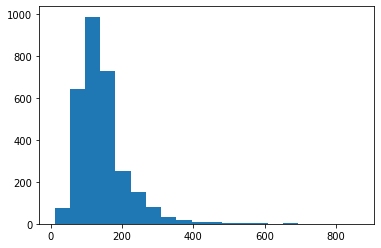

In [21]:
plt.hist([len([t for t in tokens]) for tokens in tokenized], bins=20);

In [22]:
MAX_LEN = 400

In [23]:
from keras.preprocessing.sequence import pad_sequences

def prepare_sequences(texts, max_len, vocab={"<UNK>": 1, "<PAD>": 0}):
    X = [[vocab.get(w.text, vocab["<UNK>"]) for w in s] for s in texts]
    return pad_sequences(maxlen=max_len, sequences=X, padding="post", value=vocab["<PAD>"])

In [24]:
X_seq = prepare_sequences(tokenized, max_len=MAX_LEN, vocab=vocab)

In [25]:
X_seq[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
y_seq = []
for l in labels:
    y_i = []
    for i in range(MAX_LEN):
        try:
            y_i.append(float(l[i]))
        except:
            y_i.append(0.0)
    y_seq.append(np.array(y_i))
y_seq = np.array(y_seq)
y_seq = y_seq.reshape(y_seq.shape[0], y_seq.shape[1], 1)

In [27]:
# ML with TensorFlow

import tensorflow as tf
from tensorflow.keras import layers

print(tf.version.VERSION)
print(tf.keras.__version__)

2.7.0
2.7.0


In [28]:
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=len(vocab), mask_zero=True, output_dim=50))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.Bidirectional(layers.LSTM(units=64, return_sequences=True)))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.Bidirectional(layers.LSTM(units=64, return_sequences=True)))
model.add(layers.TimeDistributed(layers.Dense(1, activation='sigmoid')))

In [29]:
model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          21262950  
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 50)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        58880     
 l)                                                              
                                                                 
 spatial_dropout1d_1 (Spatia  (None, None, 128)        0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        98816     
 nal)                                                   

In [31]:
history = model.fit(X_seq, y_seq, epochs=10, batch_size=256, validation_split=0.1)

Epoch 1/10
11/11 [==============================] - 275s 23s/step - loss: 0.1760 - accuracy: 0.8490 - val_loss: 0.1121 - val_accuracy: 0.9140
Epoch 2/10
11/11 [==============================] - 257s 24s/step - loss: 0.1138 - accuracy: 0.9114 - val_loss: 0.1028 - val_accuracy: 0.9140
Epoch 3/10
11/11 [==============================] - 268s 24s/step - loss: 0.1078 - accuracy: 0.9114 - val_loss: 0.1013 - val_accuracy: 0.9140
Epoch 4/10
11/11 [==============================] - 304s 28s/step - loss: 0.1063 - accuracy: 0.9114 - val_loss: 0.1013 - val_accuracy: 0.9140
Epoch 5/10
11/11 [==============================] - 309s 28s/step - loss: 0.1059 - accuracy: 0.9114 - val_loss: 0.1013 - val_accuracy: 0.9140
Epoch 6/10
11/11 [==============================] - 303s 28s/step - loss: 0.1058 - accuracy: 0.9114 - val_loss: 0.1010 - val_accuracy: 0.9140
Epoch 7/10
11/11 [==============================] - 306s 28s/step - loss: 0.1056 - accuracy: 0.9114 - val_loss: 0.1009 - val_accuracy: 0.9140
Epoch 

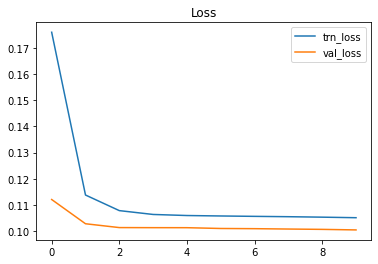

In [32]:
plt.plot(history.history["loss"], label="trn_loss");
plt.plot(history.history["val_loss"], label="val_loss");
plt.legend();
plt.title("Loss");

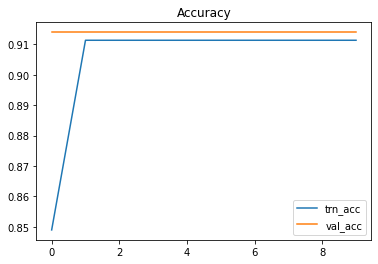

In [33]:
plt.plot(history.history["accuracy"], label="trn_acc");
plt.plot(history.history["val_accuracy"], label="val_acc");
plt.legend();
plt.title("Accuracy");

In [34]:
# Analyse the predictions of the model
# Now that the model is trained, we can look at some predictions on the training set.
y_pred = model.predict(X_seq, verbose=1, batch_size=1024)

3/3 [==============================] - 61s 18s/step


In [36]:
i = 2343
pred_i = y_pred[i] > 0.05

In [37]:
tokenized[i]

Die Brotscheiben 5-10 Minuten in Wasser einweichen und ausdrücken. Alle Zutaten für die Suppe in einen Mixer zu einer glatten Creme rühren und durch ein Sieb streichen. Evt. nachwürzen und mehrere Stunden kaltstellen. Die Suppe muss eiskalt sein.Gurke schälen und fein würfeln. Paprikaschote von Kerngehäuse und den weißen Rippen befreien und in feine Würfel schneiden. Tomaten abziehen und fein würfeln und mit fein gehackter Zwiebel vermischen.Jede Portion mit einem gehäuften Löffel der Garnierung ihrer Wahl anrichten und servieren.

In [38]:
ingreds = [t.text for t, p in zip(tokenized[i], pred_i) if p]
print(set(ingreds))

{'Alle', 'Kerngehäuse', 'Die', 'mit', 'Würfel', 'anrichten', '10', 'einweichen', '5', 'von', '.', 'durch', 'befreien', 'schneiden', 'glatten', 'zu', 'eiskalt', 'einem', 'ihrer', 'würfeln', '-', 'Creme', 'Paprikaschote', 'gehäuften', 'und', 'für', 'ein', 'rühren', 'die', 'fein', 'gehackter', 'Portion', 'Zutaten', 'Suppe', 'vermischen', 'der', 'Jede', 'abziehen', 'einer', 'muss', 'einen', 'streichen', 'Stunden', 'schälen', 'in', 'nachwürzen', 'kaltstellen', 'Mixer', 'Gurke', 'feine', 'den', 'Tomaten', 'sein', 'Löffel', 'Minuten', 'Evt', 'Brotscheiben', 'Zwiebel', 'servieren', 'Garnierung', 'ausdrücken', 'Rippen', 'Wahl', 'Sieb', 'mehrere', 'Wasser', 'weißen'}


In [41]:
ingreds = [t.text for t, p in zip(tokenized[i], y_seq[i]) if p]
set(ingreds)

{'Gurke', 'Paprikaschote', 'Tomaten', 'Wasser', 'Zwiebel'}

In [42]:
ingredients[i]

['500 g Tomate(n), reif, abgezogen',
 '3 Zehe/n Knoblauch, geschält (bis 4 Zehen)',
 '2 EL Olivenöl',
 '12 EL Essig (Weinessig)',
 'Salz und Pfeffer',
 '250 ml Wasser, eiskalt',
 '2 Scheibe/n Brot(e) (altbackenes Meterbrot ohne Rinde)',
 '1 TL Paprikapulver, rosenscharf',
 '1 Frühlingszwiebel(n)',
 '1/2TL Kreuzkümmel, zerstoßen',
 '2 EL Basilikum, Blätter, frisch gezupft',
 'Für die Garnitur:',
 '1 Gurke(n), klein',
 '1 Paprikaschote(n), rot',
 '4 EL Zwiebel(n), feingehackt',
 '2 Tomate(n)']

In [44]:
# This looks very good! Our model seems to be able to identify the ingredients better than our training labels.
# So we now use the produced labels for fine-tuning the network.


In [45]:
new_labels = []
for pred_i, ti in zip(y_pred, tokenized):
    l_i = []
    ci = [t.text for t, p in zip(tokenized[i], pred_i > 0.05) if p]
    label = []
    for token in ti:
        l_i.append(any((c == token.text or c == token.text[:-1] or c[:-1] == token.text) for c in ci))
    new_labels.append(l_i)

In [46]:
y_seq_new = []
for l in new_labels:
    y_i = []
    for i in range(MAX_LEN):
        try:
            y_i.append(float(l[i]))
        except:
            y_i.append(0.0)
    y_seq_new.append(np.array(y_i))
y_seq_new = np.array(y_seq_new)
y_seq_new = y_seq.reshape(y_seq_new.shape[0], y_seq_new.shape[1], 1)

In [47]:
# We fit the network again for one epoch with the new labels.
history = model.fit(X_seq, y_seq_new, epochs=1, batch_size=256, validation_split=0.1)

11/11 [==============================] - 309s 28s/step - loss: 0.1048 - accuracy: 0.9114 - val_loss: 0.1002 - val_accuracy: 0.9140


In [48]:
# Look at test data
eval_ingredients = eval_df.Ingredients.values

In [49]:
eval_tokenized = [nlp(t) for t in eval_df.Instructions.values]

X_seq_test = prepare_sequences(eval_tokenized, max_len=MAX_LEN, vocab=vocab)

In [50]:
y_pred_test = model.predict(X_seq_test, verbose=1, batch_size=1024)

1/1 [==============================] - 10s 10s/step


In [51]:
i = 893
pred_i = y_pred_test[i] > 0.05
print(eval_tokenized[i])
print()
print(eval_ingredients[i])
print()
ingreds = [t.text for t, p in zip(eval_tokenized[i], pred_i) if p]
print(set(ingreds))

Die Kartoffeln schälen und gar kochen.Während die Kartoffeln kochen, wird die Buttermilch erwärmt - aber langsam, da sie sehr schnell anbrennt. Man sollte erst 1/3 von der Buttermilch in einen Topf gießen und mit 1 EL Mehl das Ganze verquirlen, damit der Eintopf nicht zu dünn wird. Danach den Rest dazugießen. Wenn man mag, kann man 2-3 Lorbeerblätter und Pfefferkörner mit hineintun.Die Zwiebel schälen und klein schneiden. Ca. 200 g Speck würfeln. Erst den Speck schön in der Pfanne auslassen. Dann die Zwiebeln zugeben und so lange mitbraten, bis alles schön durch ist. Das Ganze dann in den Topf zu der Buttermilch geben.Sobald die Kartoffeln gar sind, abgießen und kurz umrühren. Dann auch einfach mit in den Topf geben und umrühren. Die Buttermilchkartoffeln werden nun noch mit Salz, Pfeffer und 2-3 EL Zucker abgeschmeckt. Dadurch wird das Gericht lieblich und süß-sauer.Dazu schmecken sehr gut Wiener Würstchen oder Knacker.

['1 kg Kartoffel(n)', '1 Liter Buttermilch', '1 Zwiebel(n)', '20

In [52]:
i = 26
pred_i = y_pred_test[i] > 0.05
print(eval_tokenized[i])
print()
print(eval_ingredients[i])
print()
ingreds = [t.text for t, p in zip(eval_tokenized[i], pred_i) if p]
print(set(ingreds))

In einer großen Pfanne oder Topf Butter und Öl erhitzen. Den Wirsing kurz andünsten, 3 EL Wasser zugeben und abgedeckt unter häufigem Wenden weich dünsten. Mit Salz, Pfeffer und Muskat würzen. Abkühlen lassen.Eine Springform 26cm mit Blätterteig auskleiden, den Boden mit einer Gabel regelmäßig einstechen. Eier, Milch, Sahne und Käse verrühren, den Wirsing untermischen. In die Springform geben. Bei 170°C 35 bis 45 Minuten auf unterer Schiene backen, evtl. gegen Ende mit Pergamentpapier abdecken. Frisch aus dem Ofen servieren.

['600 g Wirsing, geputzt und in Streifen geschnitten', '1 EL Butter', '1 EL Öl (Sonnenblumenöl)', 'Blätterteig, für 1 Springform 26 cm', '3 Ei(er)', '150 ml Milch', '100 ml Sahne', '100 g Bergkäse, gerieben', 'Salz', 'Pfeffer, schwarz aus der Mühle', 'Muskat']

{'dem', 'Topf', 'kurz', 'dünsten', 'andünsten', '°', 'mit', 'auskleiden', 'Sahne', 'Gabel', 'C', 'backen', 'evtl.', 'untermischen', '.', 'In', 'Butter', '3', '35', '170', 'Milch', 'Schiene', 'Eine', 'Käse',